In [32]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
import matplotlib.pyplot as plt


train_data1 = np.load('data2.npy')
train_lab1 = np.load('lab2.npy')

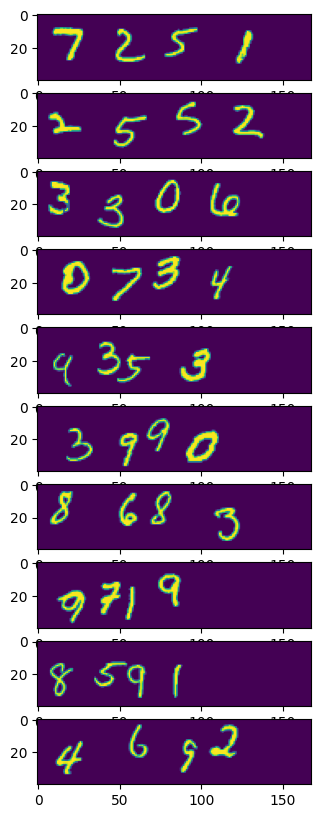

In [19]:
_, ax = plt.subplots(10,1, figsize=(10,10))

for i in range(10):
    ax[i].imshow(train_data1[i])

In [28]:
train_data1.shape

(10000, 40, 168)

In [44]:
class MyData(torch.utils.data.Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32) / 256, self.label[idx]

    def __len__(self):
        return len(self.label)


    

In [45]:
class ConvNet(nn.Module):
    def __init__(self, input_channels, num_classes):
        super().__init__()
        # Assuming input images are 40 x 168


        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 20 x 84


        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 10 x 42


        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 5 x 21

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 2 x 10 

        self.flattened_size = 64 * 2 * 10


        self.fc = nn.Linear(self.flattened_size, num_classes)

    def forward(self, x):

        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))

        x = x.view(-1, self.flattened_size)

        x = self.fc(x)
        return x

In [52]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        correct_predictions = (predicted == labels).sum().item()
        total_samples = labels.size(0)
        accuracy = (correct_predictions / total_samples) * 100

        if idx % 10 == 1 :
            print(accuracy, loss)
        

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

In [56]:
input_channels = 1  
num_classes = 37
learning_rate = 0.1
batch_size = 64
num_epochs = 10


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ConvNet(input_channels=input_channels, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
train_data0 = np.load('data0.npy')
train_lab0 = np.load('lab0.npy')

train_data1 = np.load('data1.npy')
train_lab1 = np.load('lab1.npy')

train_loader = torch.utils.data.DataLoader(MyData(train_data0, train_lab0))
val_loader = torch.utils.data.DataLoader(MyData(train_data1, train_lab1))

In [58]:
# Training loop
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for idx, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).sum().item()
            total_samples = labels.size(0)
            accuracy = (correct_predictions / total_samples) * 100
    val_loss /= len(val_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

print("Training finished!")

0.0 tensor(3623.1736, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.7559, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(2.8368, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(2.6497, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(2.5905, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(4.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.8037, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(6.3982, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(6.5918, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(2.6724, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.2403, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.1709, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.4798, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(3.2692, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(4.4552, device='cuda:0', grad_fn=<NllLossBackward0>)
0.0 tensor(2.3048, device='cuda:0', g

KeyboardInterrupt: 